# **COVID-19 Data Analysis: Global and Segmented Trends.**
---

## **1. About data :-**
- full_grouped.csv - Day to day country wise no. of cases (Has County/State/Province level data)
- covid_19_clean_complete.csv - Day to day country wise no. of cases (Doesn't have County/State/Province level data)
- country_wise_latest.csv - Latest country level no. of cases
- day_wise.csv - Day wise no. of cases (Doesn't have country level data)
- usa_county_wise.csv - Day to day county level no. of cases
- worldometer_data.csv - Latest data from https://www.worldometers.info/
---
## **2. Data Source :-**
- https://www.kaggle.com/datasets/imdevskp/corona-virus-report/data
---
## **3. Problem Statement :-**
- **Analyze the provided COVID-19 datasets to identify global case/death trends, assess regional disparities, and investigate the factors (like population/density) that correlate with infection and mortality rates.**
---


## **4. Data Loading & Inspection :-**

## **4.1 Importing Libraries :-**

In [173]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,recall_score, f1_score,precision_score
import warnings


## **4.2 Functions used :-**

In [138]:
def load_data_files(directory_path, file_extension='csv'):
    """
    Retrieves a list of filenames without extensions from a given directory.

    Args:
        directory_path (str): Path to the folder containing data files.
        file_extension (str, optional): Extension of files to search for.
                                        Defaults to 'csv'.

    Returns:
        list: A list of strings, where each string is a file's name 
              (without the extension). Returns an empty dict if no files are found.
    """
    csv_search = os.path.join(directory_path,f'*.{file_extension}')
    file_paths = glob.glob(csv_search)
    
    if not file_paths:
        print(f"No files found in '{directory_path}' with extension '.{file_extension}'")
        return {} # NOTE: The function currently returns an empty dict here, not list.
    
    Filenames = []
    
    for file_path in file_paths:
        
        base_name = os.path.basename(file_path)
        DataSet_Name = os.path.splitext(base_name)[0]
        Filenames.append(DataSet_Name)
            
    return Filenames

## **4.3 Loading Data :-**

In [139]:
#  Using loading data function 
data_folder = './archive'

files = load_data_files(data_folder, file_extension='csv')

In [140]:
# list of files as Outcome of the functions
files

['country_wise_latest',
 'covid_19_clean_complete',
 'day_wise',
 'full_grouped',
 'usa_county_wise',
 'worldometer_data']

In [141]:
# loading files to their respective file names
country_wise_latest = pd.read_csv(f'{data_folder}/{files[0]}.csv')
covid_19_clean_complete = pd.read_csv(f'{data_folder}/{files[1]}.csv')
day_wise = pd.read_csv(f'{data_folder}/{files[2]}.csv')
full_grouped = pd.read_csv(f'{data_folder}/{files[3]}.csv')
usa_county_wise = pd.read_csv(f'{data_folder}/{files[4]}.csv')
world_data = pd.read_csv(f'{data_folder}/{files[5]}.csv')

## **4.4 Data Quality Checking & Wrangling :-** 

## 4.4.1 World Wise Data

In [142]:
# Seeing world data 
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [143]:
# inspect Covid world data and gaining more information on it's columns data types
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [144]:
# Checking the null values of each column in the Covid world dataset
world_data.isnull().sum()

Country/Region        0
Continent             1
Population            1
TotalCases            0
NewCases            205
TotalDeaths          21
NewDeaths           206
TotalRecovered        4
NewRecovered        206
ActiveCases           4
Serious,Critical     87
Tot Cases/1M pop      1
Deaths/1M pop        22
TotalTests           18
Tests/1M pop         18
WHO Region           25
dtype: int64

In [145]:
# Checking the duplicated values of each column in the world dataset
world_data.duplicated().sum()

np.int64(0)

In [146]:
# Preparing Float64 columns to change them into int64
float_cols = world_data.select_dtypes(include=['float64']).columns
float_cols = float_cols.drop(['Tests/1M pop','Deaths/1M pop','Tot Cases/1M pop'])
float_cols

Index(['Population', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests'],
      dtype='object')

In [147]:
# looping through the Float64 columns to change them into int64 
for col in float_cols:
    try:
        world_data[col] = world_data[col].astype('Int64')
    except Exception as e:
        print(f"Could not convert column '{col}'. Error: {e}")

In [148]:
# Checking specific row
zero_rows = world_data.loc[world_data['Country/Region'] == 'Diamond Princess',:]
zero_rows

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
156,Diamond Princess,NaN,<NA>,712,<NA>,13,<NA>,651,<NA>,48,4,NaN,NaN,<NA>,NaN,NaN


In [149]:
# Removing a row with consecutive zero or null values from the data 
world_data =  world_data[world_data['Country/Region'] != 'Diamond Princess']

In [150]:
# Replacing the values of WHO region with Continent to have a valuable comparison later
mask = world_data['WHO Region'].isna()
world_data.loc[mask, 'WHO Region'] = world_data.loc[mask, 'Continent']

In [151]:
# Replacing the na values with 0 as its not useful as na
world_data.fillna(0,inplace=True)

In [152]:
# reinspect Covid world data and gaining more information on it's columns data types
world_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    208 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    Int64  
 3   TotalCases        208 non-null    int64  
 4   NewCases          208 non-null    Int64  
 5   TotalDeaths       208 non-null    Int64  
 6   NewDeaths         208 non-null    Int64  
 7   TotalRecovered    208 non-null    Int64  
 8   NewRecovered      208 non-null    Int64  
 9   ActiveCases       208 non-null    Int64  
 10  Serious,Critical  208 non-null    Int64  
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     208 non-null    float64
 13  TotalTests        208 non-null    Int64  
 14  Tests/1M pop      208 non-null    float64
 15  WHO Region        208 non-null    object 
dtypes: Int64(9), float64(3), int64(1), object(3)
memo

In [153]:
# Checking the null values of each column in the Covid world dataset
world_data.isnull().sum()

Country/Region      0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [154]:
# Checking the Continent values
world_data['Continent'].unique()

array(['North America', 'South America', 'Asia', 'Europe', 'Africa',
       'Australia/Oceania'], dtype=object)

In [155]:
# Checking the WHO Region values
world_data['WHO Region'].unique()

array(['Americas', 'South-EastAsia', 'Europe', 'Africa',
       'EasternMediterranean', 'WesternPacific', 'South America',
       'North America', 'Asia', 'Australia/Oceania'], dtype=object)

## 4.4.2 Day Wise Grouped per Country

In [156]:
# loading the Covid 19 fully Grouped Dataset
full_grouped.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [157]:
# inspect Covid 19 fully Grouped Dataset and gaining more information on it's columns data types
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [158]:
# Checking the null values of each column in the Covid 19 world dataset
full_grouped.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [159]:
# Checking the duplicated values of each column in the world dataset
full_grouped.duplicated().sum()

np.int64(0)

In [160]:
# converting date data type to from object to data format 
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'],format='%Y-%m-%d')
full_grouped['Date'].dtypes

dtype('<M8[ns]')

In [161]:
# creating new column of the data by the month name column
full_grouped['Month'] = full_grouped['Date'].dt.month_name()

In [162]:
 # reinspecting Covid 19 fully Grouped Dataset and gaining more information on it's columns data types
full_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
 10  Month           35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(3)
memory usage: 3.0+ MB


## **5. Exploratory Data Analysis (EDA) :-**

## 5.1 World Wise

### 5.1.1 Descriptive Analysis

In [163]:
# Descriptive Analysis of Quantitative Data
world_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,208.0,30415486.971154,104766099.481173,801.0,966314.0,7041972.5,25756135.5,1381344997.0
TotalCases,208.0,92156.028846,433583.958722,10.0,731.25,4544.0,37336.75,5032179.0
NewCases,208.0,38.086538,465.065589,0.0,0.0,0.0,0.0,6590.0
TotalDeaths,208.0,3427.855769,14762.629768,0.0,11.75,73.0,604.25,162804.0
NewDeaths,208.0,4.326923,57.030705,0.0,0.0,0.0,0.0,819.0
TotalRecovered,208.0,58026.634615,254929.336029,0.0,307.0,2073.5,19835.25,2576668.0
NewRecovered,208.0,24.605769,293.994049,0.0,0.0,0.0,0.0,4140.0
ActiveCases,208.0,27265.091346,173394.225343,0.0,74.0,862.0,7115.75,2292707.0
"Serious,Critical",208.0,313.423077,1587.511422,0.0,0.0,2.0,41.25,18296.0
Tot Cases/1M pop,208.0,3196.024038,5191.986457,3.0,282.0,1015.0,3841.75,39922.0


### 5.1.2 Correlation Analysis

In [164]:
# See the Correlation Between columns
world_CP = world_data.copy()
for col in world_CP.columns:
    if world_CP[col].dtype == 'object':
        world_CP.drop(col,axis=1, inplace=True)
        
Correlations = world_CP.corr()
Correlations

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Population,1.000000,0.546158,0.062038,0.435091,0.064131,0.589427,0.061446,0.458633,0.588463,-0.009337,0.041476,0.497840,-0.068450
TotalCases,0.546158,1.000000,0.058221,0.938926,0.059182,0.982647,0.057809,0.966947,0.967090,0.252627,0.287967,0.891409,0.038191
NewCases,0.062038,0.058221,1.000000,0.218270,0.995492,0.065644,0.999508,0.032122,0.156273,0.015607,0.138926,-0.005779,-0.037560
TotalDeaths,0.435091,0.938926,0.218270,1.000000,0.221289,0.903258,0.216887,0.897455,0.909078,0.237885,0.431003,0.851939,0.046266
NewDeaths,0.064131,0.059182,0.995492,0.221289,1.000000,0.067428,0.992144,0.031525,0.159487,0.010629,0.132750,-0.004400,-0.035107
TotalRecovered,0.589427,0.982647,0.065644,0.903258,0.067428,1.000000,0.064963,0.914577,0.949469,0.264917,0.266378,0.843356,0.029859
NewRecovered,0.061446,0.057809,0.999508,0.216887,0.992144,0.064963,1.000000,0.032247,0.154944,0.017145,0.140621,-0.006086,-0.038233
ActiveCases,0.458633,0.966947,0.032122,0.897455,0.031525,0.914577,0.032247,1.000000,0.944921,0.210366,0.229583,0.884773,0.034240
"Serious,Critical",0.588463,0.967090,0.156273,0.909078,0.159487,0.949469,0.154944,0.944921,1.000000,0.218430,0.258409,0.861341,0.023166
Tot Cases/1M pop,-0.009337,0.252627,0.015607,0.237885,0.010629,0.264917,0.017145,0.210366,0.218430,1.000000,0.498565,0.197014,0.309339


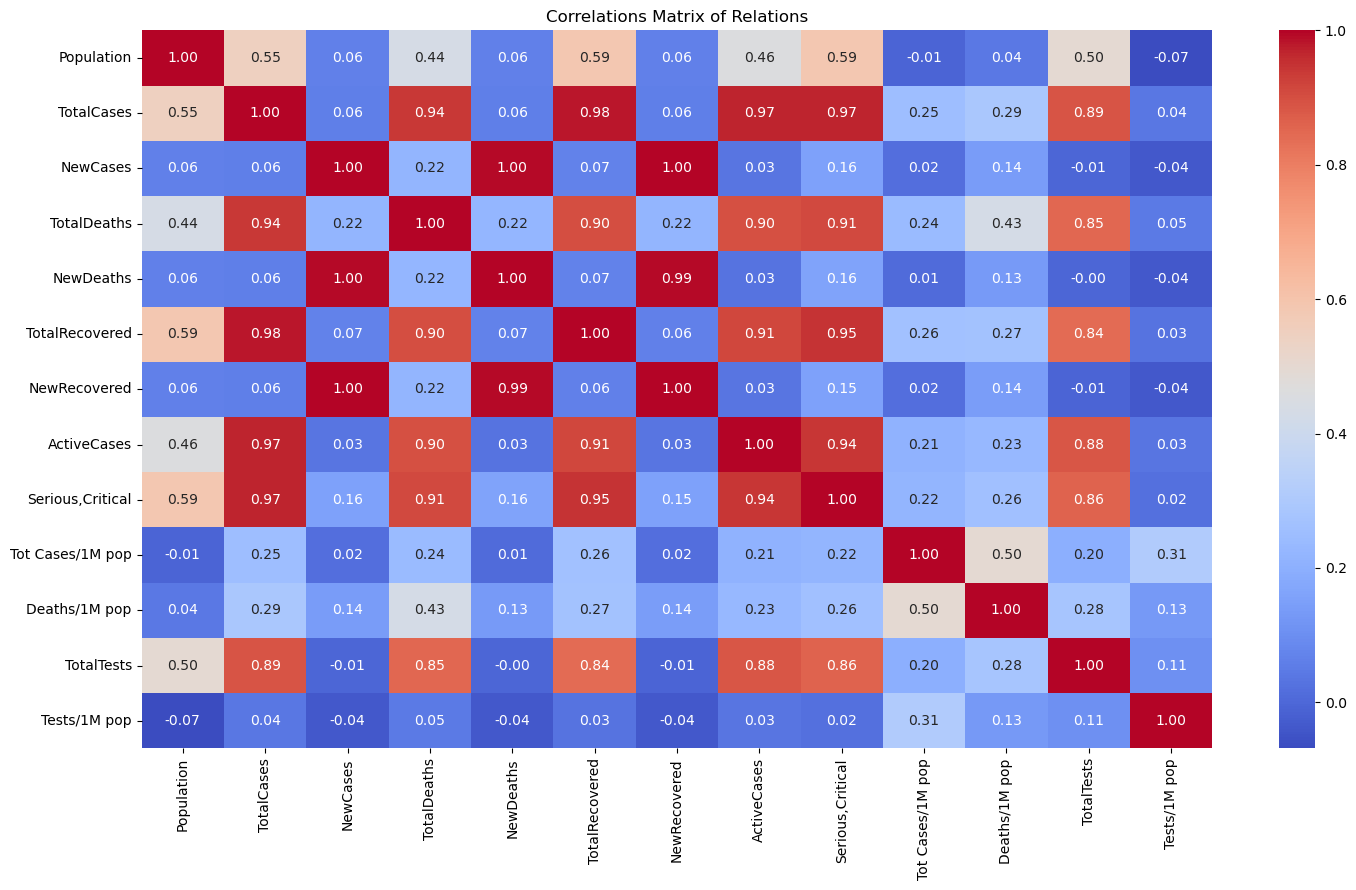

In [165]:
# Graphing the Correlations  
plt.figure(figsize=(15,9))
sns.heatmap(data=Correlations,annot=True,fmt=".2f",cmap='coolwarm')
plt.title("Correlations Matrix of Relations",loc='center')
plt.tight_layout()
plt.show()

- From the Correlation Graph we can conclude that most of the categories have correlation to some degree and that each total category have some degree for related to other total categories like
    Total Cases have high correlation with total deaths and total recovered also to the active cases and serious but it's out of the scope of our analysis.

### 5.1.3 What is the top 10 countries in Total Death, Total Cases, Total Tests ,Total Recovered Ordered by total Deaths Metric ?!

In [166]:
# Preparing a the data of the Pivot table
Tests_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='TotalTests',aggfunc='sum')
Tests_by_country = Tests_by_country.sort_values(by='TotalTests',ascending=False)
Tests_by_country = Tests_by_country.head(10)
Tests_by_country

SyntaxError: invalid syntax (2296172182.py, line 2)

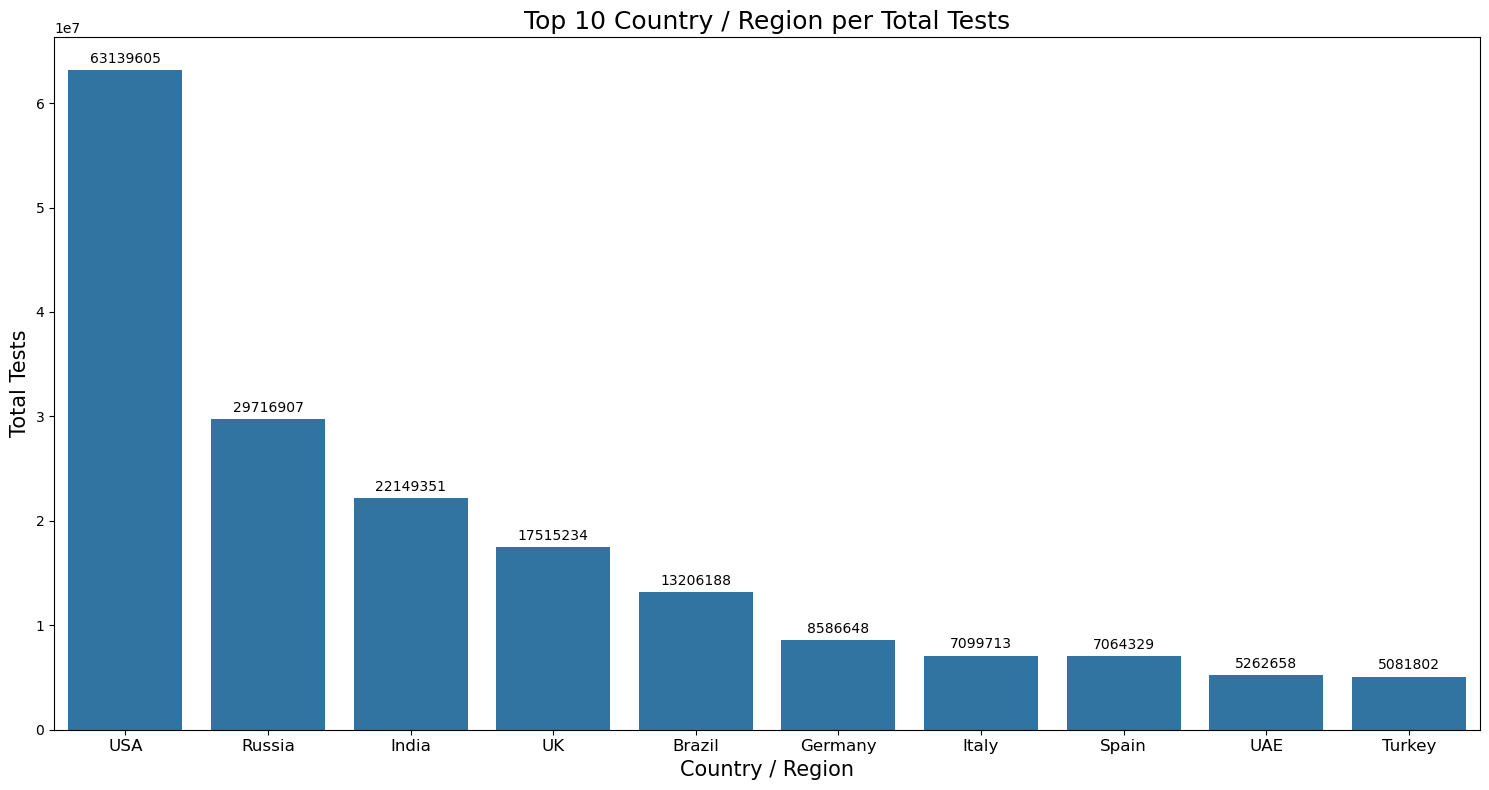

In [ ]:
# Graphing the the data of the Pivot table 
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='TotalTests', data=Tests_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Total Tests', fontsize=18)
plt.ylabel("Total Tests", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **USA, Russia and India** are the top 3 countries that **run Covid tests** on it's population.
- 2- **by far USA** have **63139605 Covid test cases** alone make it **the most country to run Covid testes** over the time of the first Pandemic.

In [ ]:
# Preparing a the data of the Pivot table
Cases_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='TotalCases',aggfunc='sum')
Cases_by_country = Cases_by_country.sort_values(by='TotalCases',ascending=False)
Cases_by_country = Cases_by_country.head(10)
Cases_by_country

,TotalCases
Country/Region,
USA,5032179
Brazil,2917562
India,2025409
Russia,871894
South Africa,538184
Mexico,462690
Peru,455409
Chile,366671
Colombia,357710


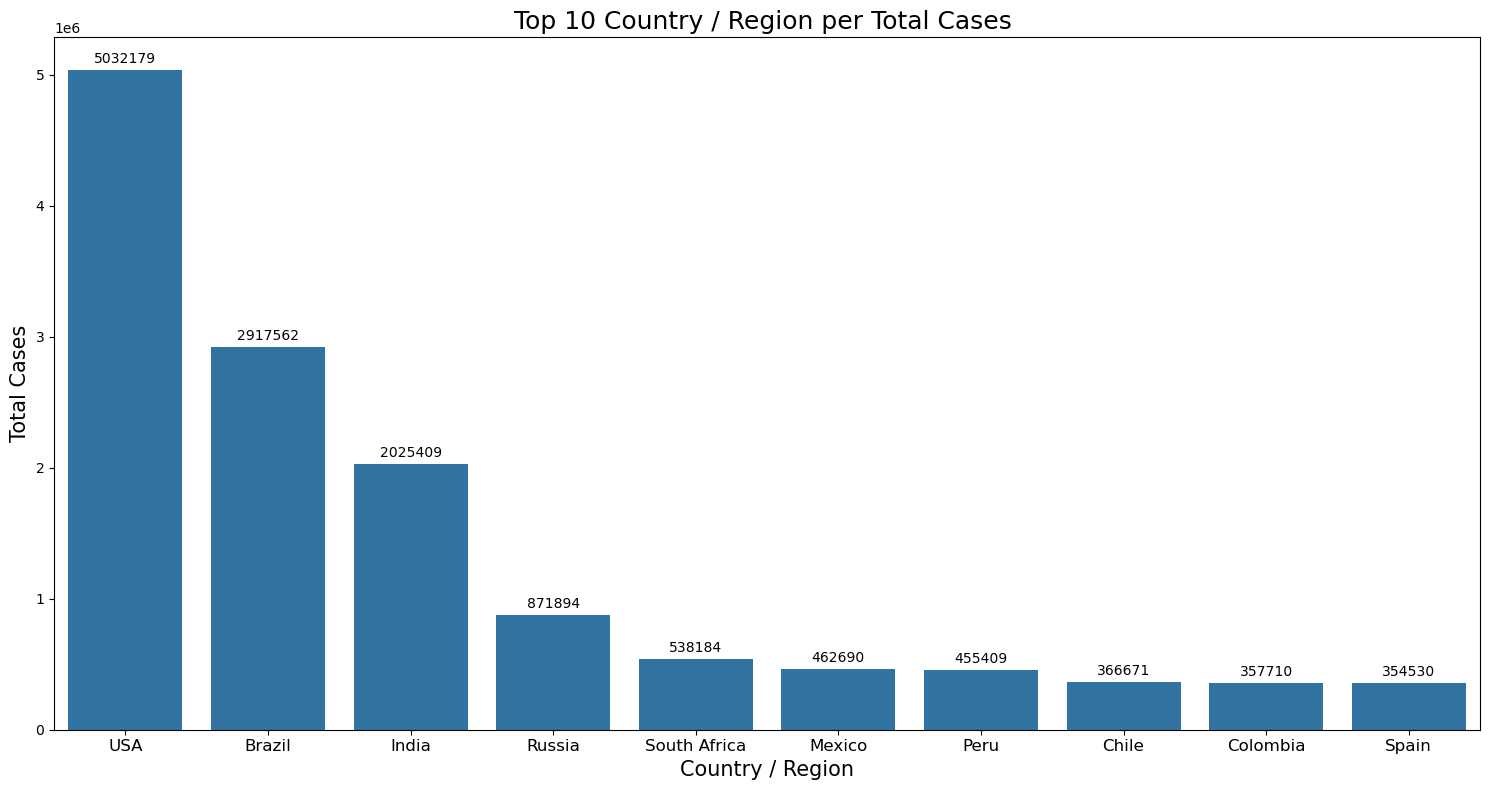

In [ ]:
# Graphing the the data of the Pivot table 
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='TotalCases', data=Cases_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Total Cases ', fontsize=18)
plt.ylabel("Total Cases", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **USA, Brazil and India** are the top 3 countries that **acknowledge Covid Cases** on it's population.
- 2- **by far USA** have **5032179 acknowledge Covid cases** alone make it **the most country** to **acknowledge Covid Cases** over the time of the first Pandemic.

In [ ]:
# Preparing a the data of the Pivot table
deaths_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='TotalDeaths',aggfunc='sum')
deaths_by_country = deaths_by_country.sort_values(by='TotalDeaths',ascending=False)
deaths_by_country = deaths_by_country.head(10)
deaths_by_country

,TotalDeaths
Country/Region,
USA,162804
Brazil,98644
Mexico,50517
UK,46413
India,41638
Italy,35187
France,30312
Spain,28500
Peru,20424


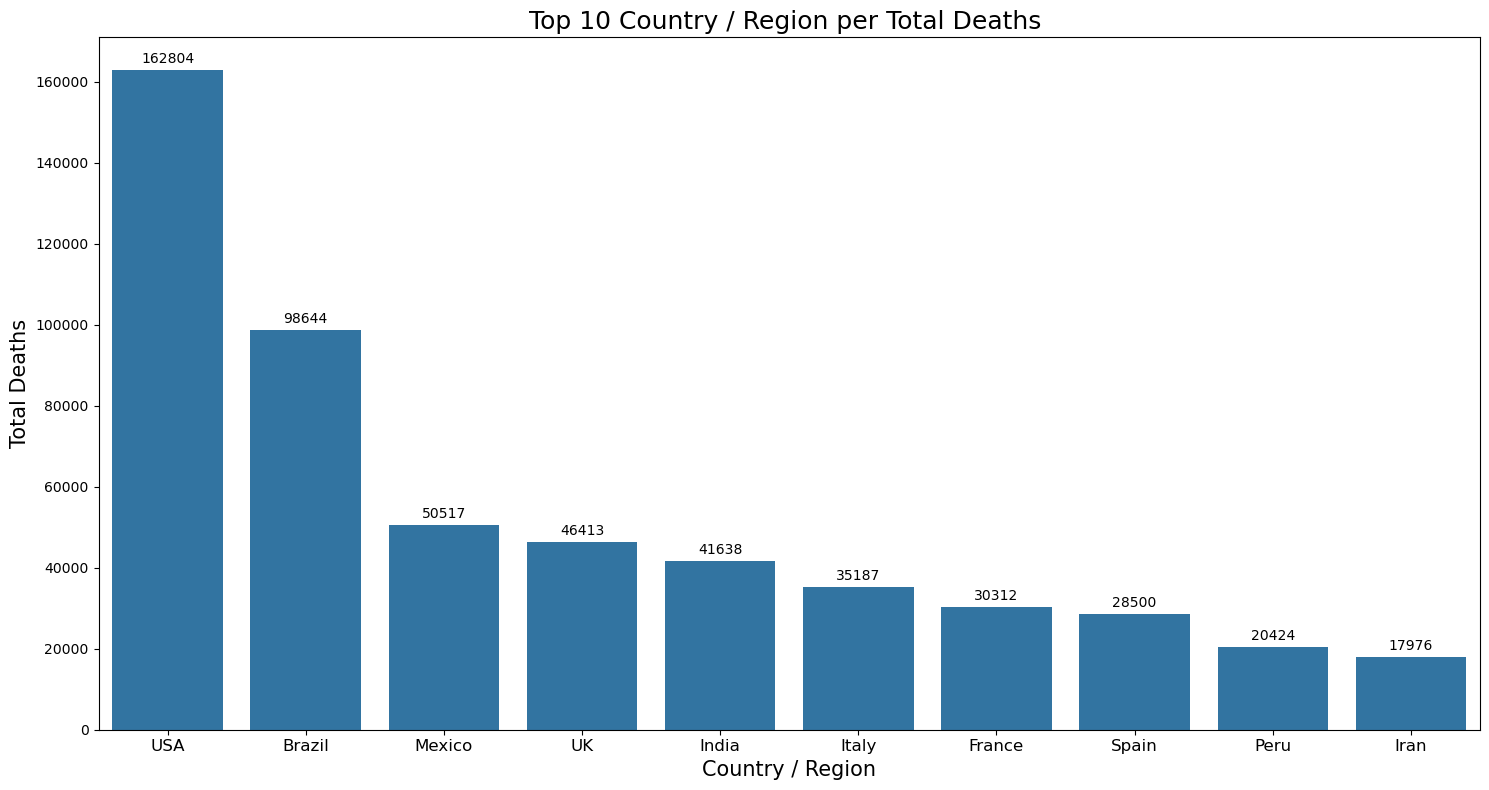

In [ ]:
# Graphing a the data of the Pivot table
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='TotalDeaths', data=deaths_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Total Deaths ', fontsize=18)
plt.ylabel("Total Deaths", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **USA, Brazil and Mexico** are the top 3 countries that **acknowledge Covid Deaths** on it's population.
- 2- **by far USA** have **162804 Death cases** alone make it **the most country** to **acknowledge Covid Deaths** over the time of the first Pandemic.

In [ ]:
# Preparing a the data of the Pivot table
Recover_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='TotalRecovered',aggfunc='sum')
Recover_by_country = Recover_by_country.sort_values(by='TotalRecovered',ascending=False)
Recover_by_country = Recover_by_country.head(10)
Recover_by_country

,TotalRecovered
Country/Region,
USA,2576668
Brazil,2047660
India,1377384
Russia,676357
South Africa,387316
Chile,340168
Peru,310337
Mexico,308848
Iran,277463


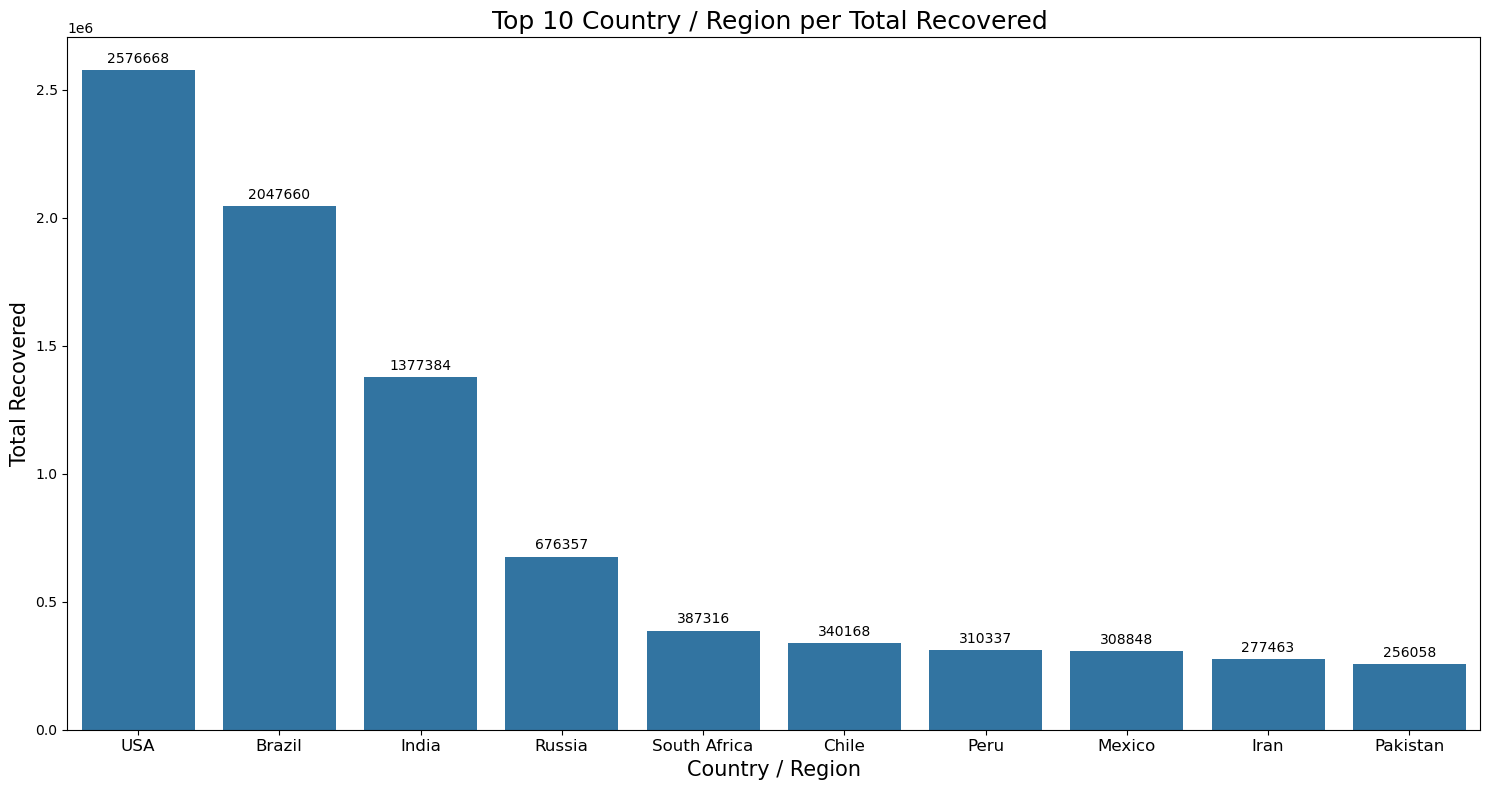

In [ ]:
# graphing a the data of the Pivot table
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='TotalRecovered', data=Recover_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Total Recovered ', fontsize=18)
plt.ylabel("Total Recovered", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **USA, Brazil and Mexico** are the top 3 countries that **Recovered Covid cases** on it's population.
- 2- **by far USA** have **2576668 Recovered Covid cases** alone make it **the most country** to **Recovered Covid cases** over the time of the first Pandemic.

In [ ]:
# Preparing a DataFrame for Totals per Region  
Totals = ['TotalTests','TotalCases','TotalDeaths','TotalRecovered']
Totals_Grouped = world_data.groupby('Country/Region')[Totals].sum().reset_index()
Totals_Grouped = Totals_Grouped.sort_values(by='TotalDeaths', ascending=False).head(10)
Totals_Grouped

,Country/Region,TotalTests,TotalCases,TotalDeaths,TotalRecovered
196,USA,63139605,5032179,162804,2576668
25,Brazil,13206188,2917562,98644,2047660
124,Mexico,1056915,462690,50517,308848
195,UK,17515234,308134,46413,0
88,India,22149351,2025409,41638,1377384
95,Italy,7099713,249204,35187,201323
66,France,3992206,195633,30312,82460
176,Spain,7064329,354530,28500,0
149,Peru,2493429,455409,20424,310337
90,Iran,2612763,320117,17976,277463


In [ ]:
# Melting or Un-the data of the Pivoting the DataFrame
Totals_Grouped_melted = Totals_Grouped.melt(id_vars=['Country/Region'],value_vars=Totals,var_name='Metric', value_name='Number')
Totals_Grouped_melted.head(5)

,Country/Region,Metric,Number
0,USA,TotalTests,63139605
1,Brazil,TotalTests,13206188
2,Mexico,TotalTests,1056915
3,UK,TotalTests,17515234
4,India,TotalTests,22149351


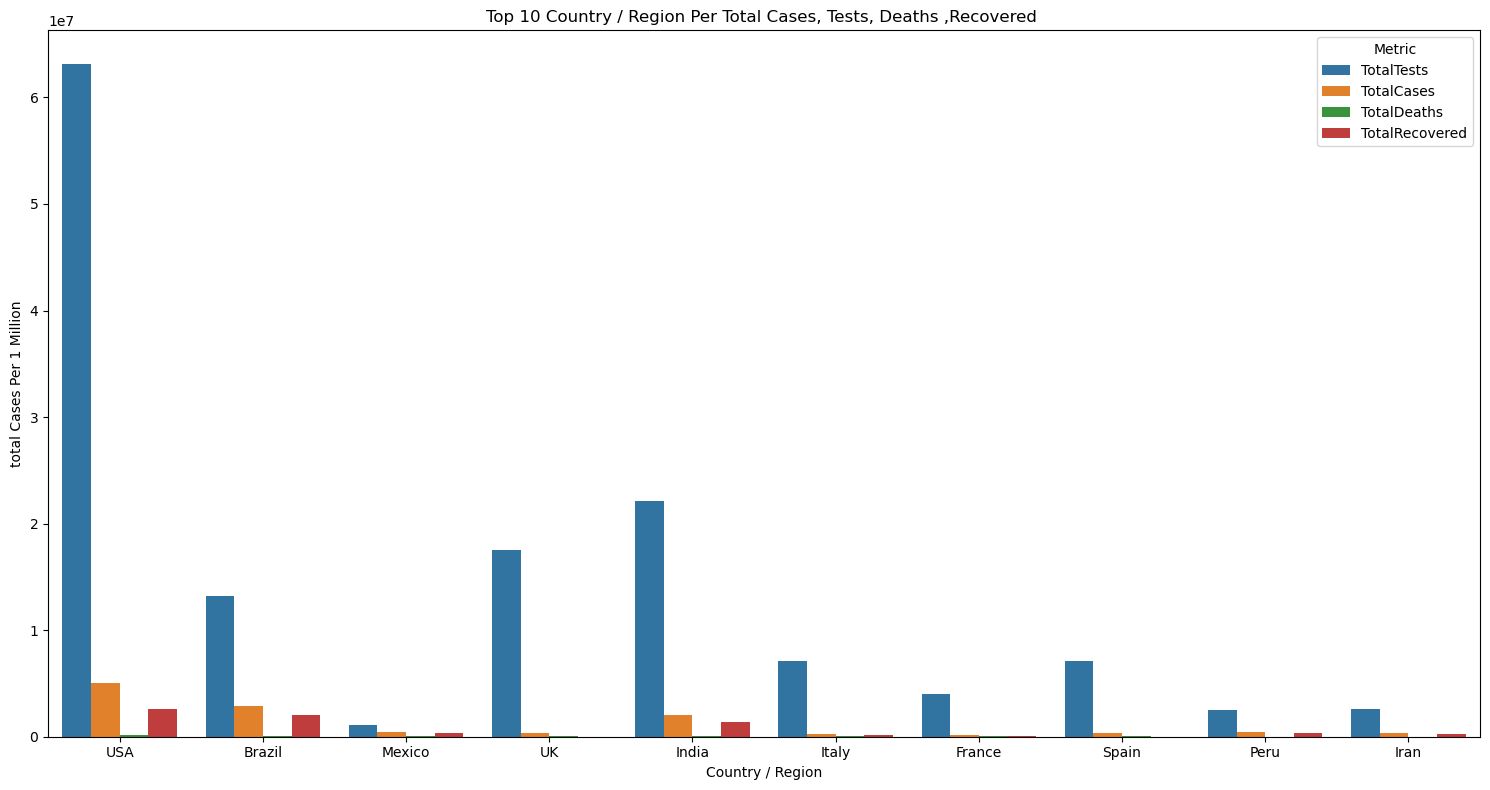

In [ ]:
# Graphing the Melted DataFrame
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(data=Totals_Grouped_melted,x='Country/Region',y='Number',hue='Metric')
plt.title('Top 10 Country / Region Per Total Cases, Tests, Deaths ,Recovered ')
plt.xlabel('Country / Region')
plt.ylabel('total Cases Per 1 Million')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- **Grouping the data of 'TotalTests','TotalCases','TotalDeaths' and 'TotalRecovered' into single graph to show case the data ordered by total deaths happened by Covid 19**

### 5.1.4 what is the top 10 Countries for the ratio of Test, Cases ,Death  Cases Category per 1m Population order by Deaths Cases ?!

In [ ]:
# Preparing a the data of the Pivot table
Tests_Per1M_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='Tests/1M pop',aggfunc='sum')
Tests_Per1M_by_country = Tests_Per1M_by_country.sort_values(by='Tests/1M pop',ascending=False)
Tests_Per1M_by_country = Tests_Per1M_by_country.head(10)
Tests_Per1M_by_country

,Tests/1M pop
Country/Region,
Luxembourg,995282.0
Monaco,972982.0
Faeroe Islands,880590.0
Gibraltar,684565.0
UAE,531470.0
Falkland Islands,520493.0
Bahrain,513691.0
Cayman Islands,472780.0
Iceland,438385.0


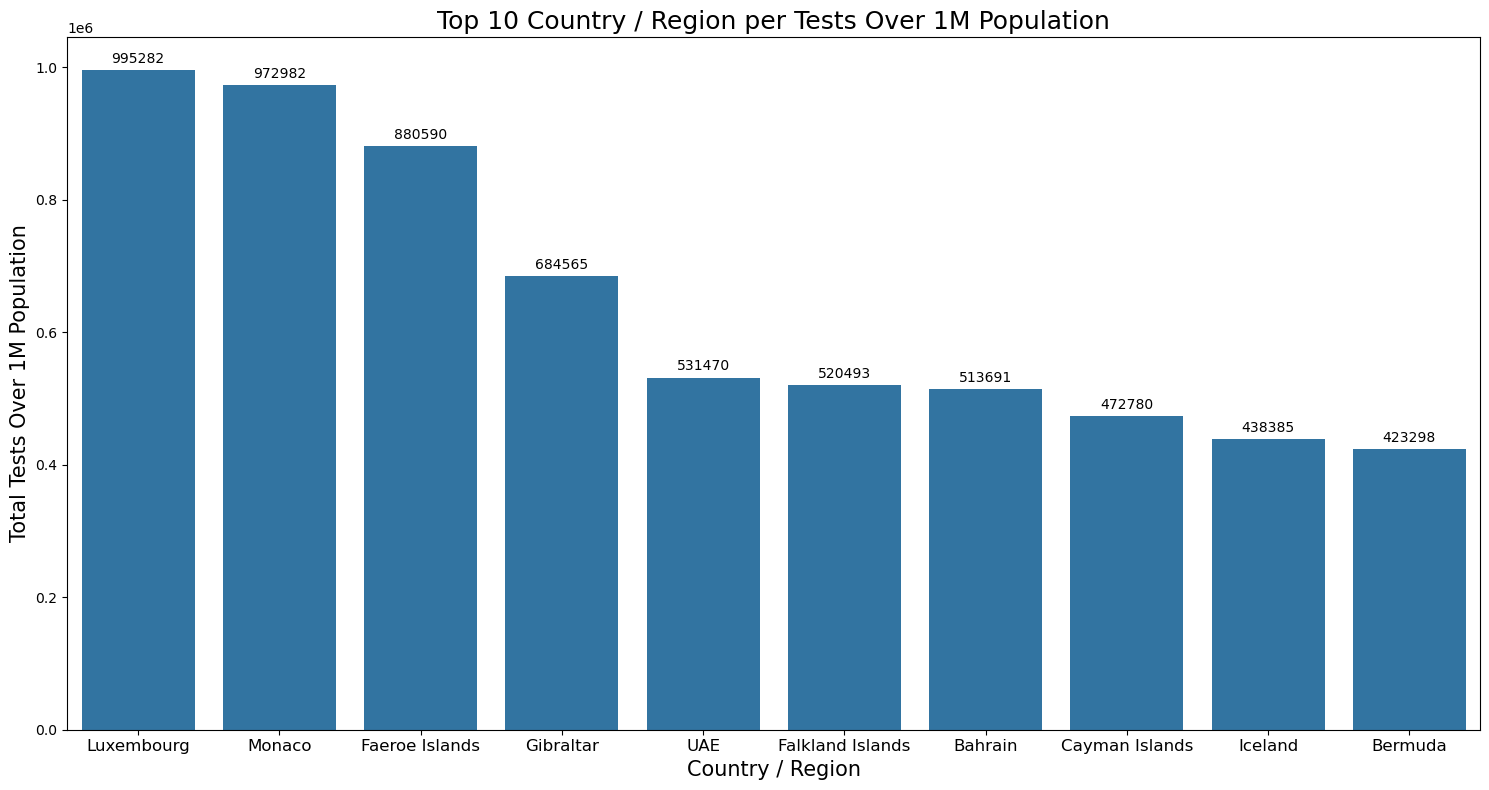

In [ ]:
# Graphing a the data of the Pivot table
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='Tests/1M pop', data=Tests_Per1M_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Tests Over 1M Population', fontsize=18)
plt.ylabel("Total Tests Over 1M Population", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **Luxembourg, Monaco and Faeroe Islands** are the top 3 countries thats runs **Total Covid Tests Per 1 Million People** on it's population.
- 2- this metrics showcases that most small countries in Population have more testing abilities to get the potential cases for checking Covid-19.

In [ ]:
# Preparing a the data of the Pivot table
Cases_Per1M_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='Tot Cases/1M pop',aggfunc='sum')
Cases_Per1M_by_country = Cases_Per1M_by_country.sort_values(by='Tot Cases/1M pop',ascending=False)
Cases_Per1M_by_country = Cases_Per1M_by_country.head(10)
Cases_Per1M_by_country

,Tot Cases/1M pop
Country/Region,
Qatar,39922.0
French Guiana,27146.0
Bahrain,25130.0
San Marino,20596.0
Chile,19165.0
Panama,16527.0
Kuwait,16378.0
Oman,15769.0
USA,15194.0


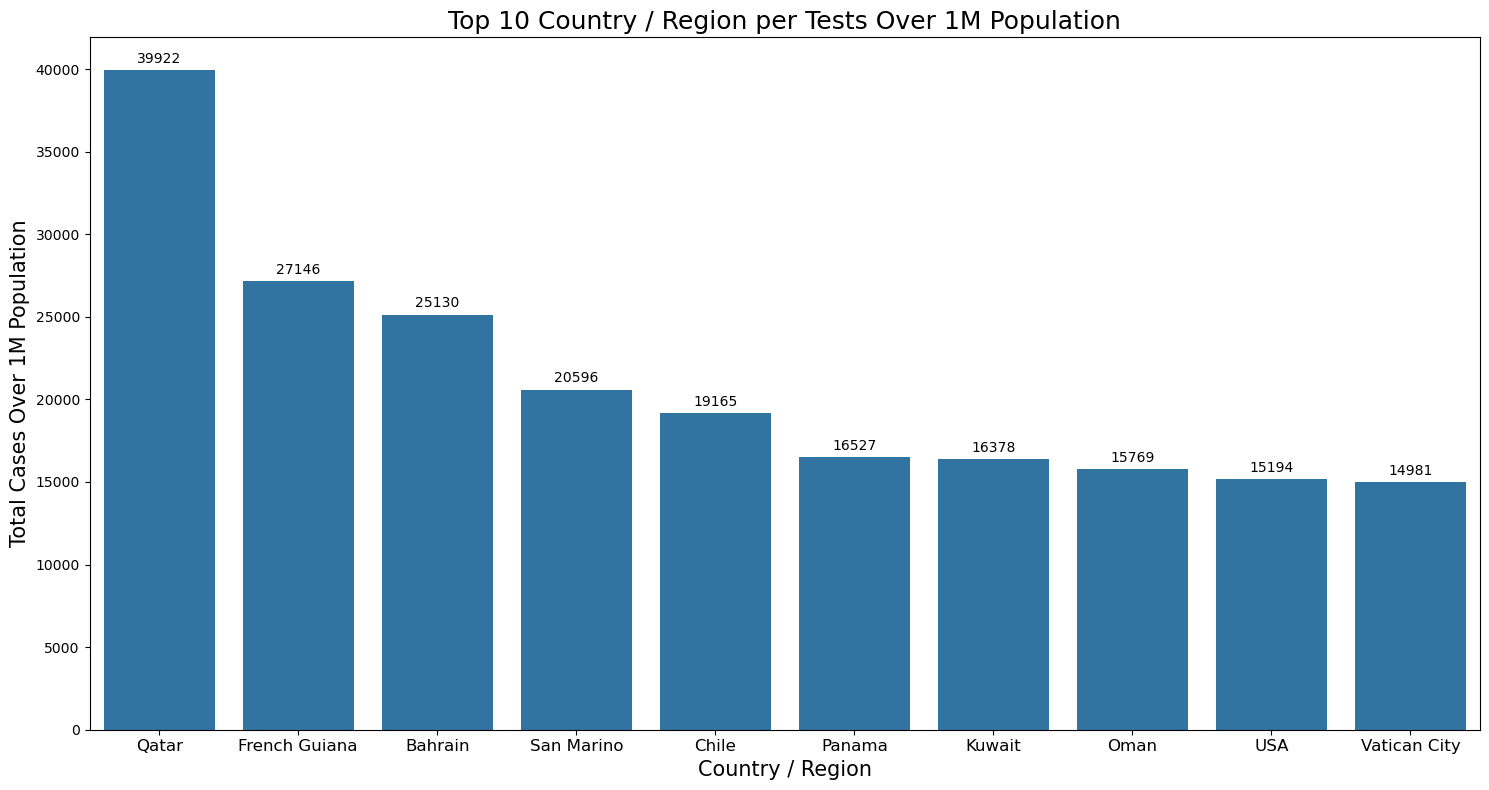

In [ ]:
# Graphing a the data of the Pivot table
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='Tot Cases/1M pop', data=Cases_Per1M_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Tests Over 1M Population', fontsize=18)
plt.ylabel("Total Cases Over 1M Population", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **Qatar, French Guiana and Bahrain** are the top 3 countries thats runs **Total Covid Cases Per 1 Million People** on it's population.
- 2- this Graph showcases that most small countries in Population have more abilities to get the cases for checking Covid-19 Spreading.

In [ ]:
# Preparing a the data of the Pivot table
Deaths_Per1M_by_country = pd.the data of the Pivot_table(data=world_data,index='Country/Region',values='Deaths/1M pop',aggfunc='sum')
Deaths_Per1M_by_country = Deaths_Per1M_by_country.sort_values(by='Deaths/1M pop',ascending=False)
Deaths_Per1M_by_country = Deaths_Per1M_by_country.head(10)
Deaths_Per1M_by_country

,Deaths/1M pop
Country/Region,
San Marino,1238.0
Belgium,850.0
UK,683.0
Andorra,673.0
Peru,619.0
Spain,610.0
Italy,582.0
Sweden,571.0
Chile,517.0


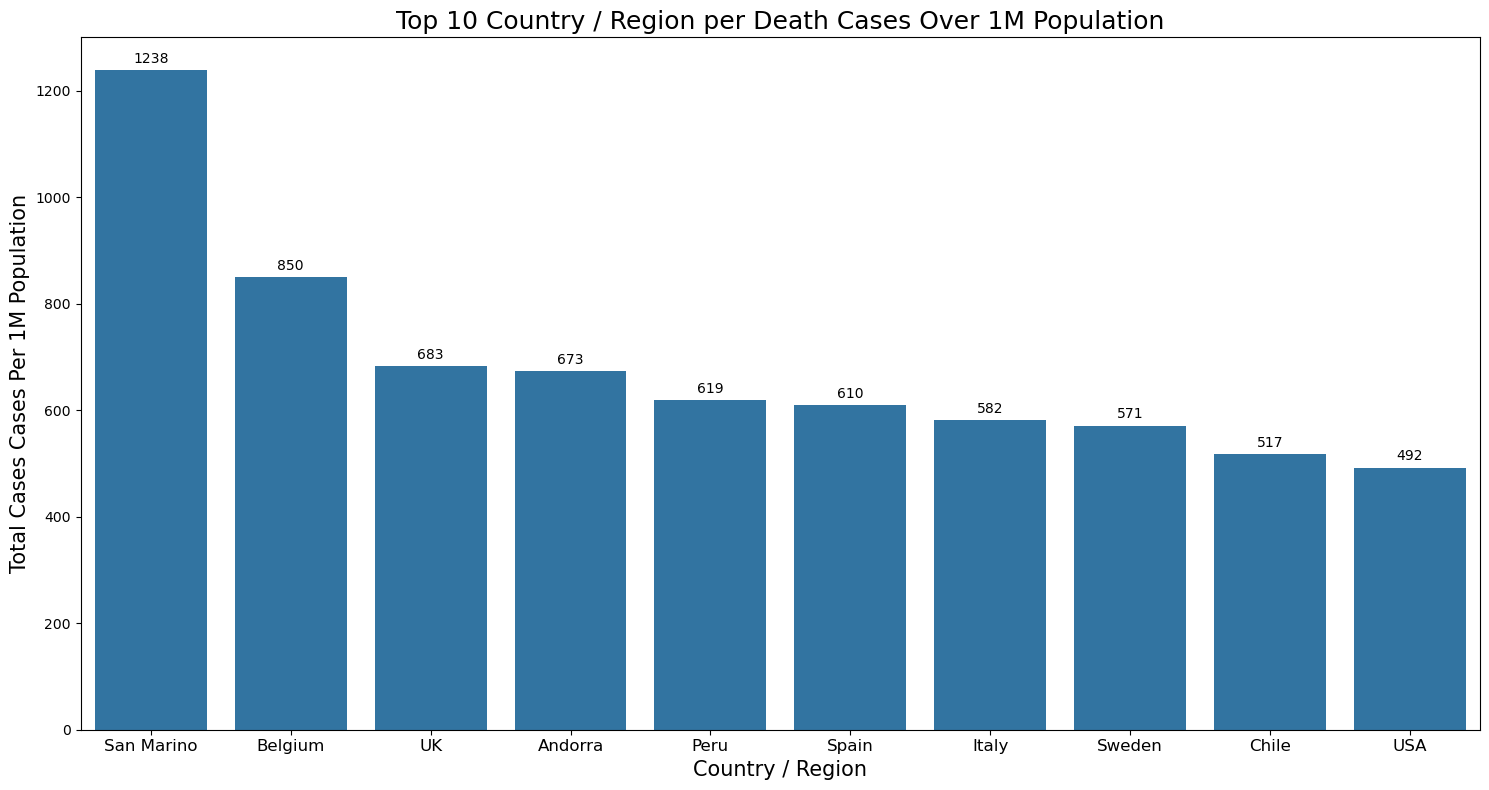

In [ ]:
# Graphing a the data of the Pivot table
fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x='Country/Region', y='Deaths/1M pop', data=Deaths_Per1M_by_country, ax=ax)

for cont in ax.containers:
    ax.bar_label(cont,fmt='%.0f', padding=3)
    
plt.title('Top 10 Country / Region per Death Cases Over 1M Population', fontsize=18)
plt.ylabel("Total Cases Cases Per 1M Population", fontsize=15)
plt.xlabel("Country / Region", fontsize=15)
plt.xticks(fontsize=12)
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- that **San-Marino, Belgium Guiana and Uk** are the top 3 countries thats runs **Total Covid Death Cases Per 1 Million People** on it's population.
- 2- this Graph showcases that most small countries in Population have **high Amount** of **Death Cases** Compared to their population but low compared to **other Countries** Becoause of Covid 19 Spreading.

## 5.2 Day Wise Grouped per Country 

### 5.2.1 Descriptive Analysis 

In [ ]:
# Descriptive Analysis of Quantitative Data
full_grouped.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,35156,2020-04-24 12:00:00,2020-01-22 00:00:00,2020-03-08 18:00:00,2020-04-24 12:00:00,2020-06-10 06:00:00,2020-07-27 00:00:00,NaN
Confirmed,35156.0,23566.631073,0.0,1.0,250.0,3640.25,4290259.0,149981.835259
Deaths,35156.0,1234.068239,0.0,0.0,4.0,78.25,148011.0,7437.238354
Recovered,35156.0,11048.134856,0.0,0.0,33.0,1286.25,1846641.0,64546.400787
Active,35156.0,11284.427978,-2.0,0.0,85.0,1454.0,2816444.0,89971.494115
New cases,35156.0,469.36375,0.0,0.0,2.0,75.0,77255.0,3005.86754
New deaths,35156.0,18.603339,-1918.0,0.0,0.0,1.0,3887.0,115.706351
New recovered,35156.0,269.315593,-16298.0,0.0,0.0,20.0,140050.0,2068.063852


### 5.2.2 Correlation Analysis

In [178]:
# See the Correlation Between columns
Grouped_CP = full_grouped.copy()
for col in Grouped_CP.columns:
    if Grouped_CP[col].dtype != 'int64' :
        Grouped_CP.drop(col,axis=1, inplace=True)
        
Correlations = Grouped_CP.corr() * 100
Correlations

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Confirmed,100.000000,91.201595,89.441763,94.993995,89.396564,60.281544,67.562275
Deaths,91.201595,100.000000,76.109256,89.164688,76.781229,63.028264,55.186991
Recovered,89.441763,76.109256,100.000000,71.066476,80.881568,51.515360,76.192613
Active,94.993995,89.164688,71.066476,100.000000,84.651326,58.321242,53.402651
New cases,89.396564,76.781229,80.881568,84.651326,100.000000,73.358330,72.576111
New deaths,60.281544,63.028264,51.515360,58.321242,73.358330,100.000000,50.331898
New recovered,67.562275,55.186991,76.192613,53.402651,72.576111,50.331898,100.000000


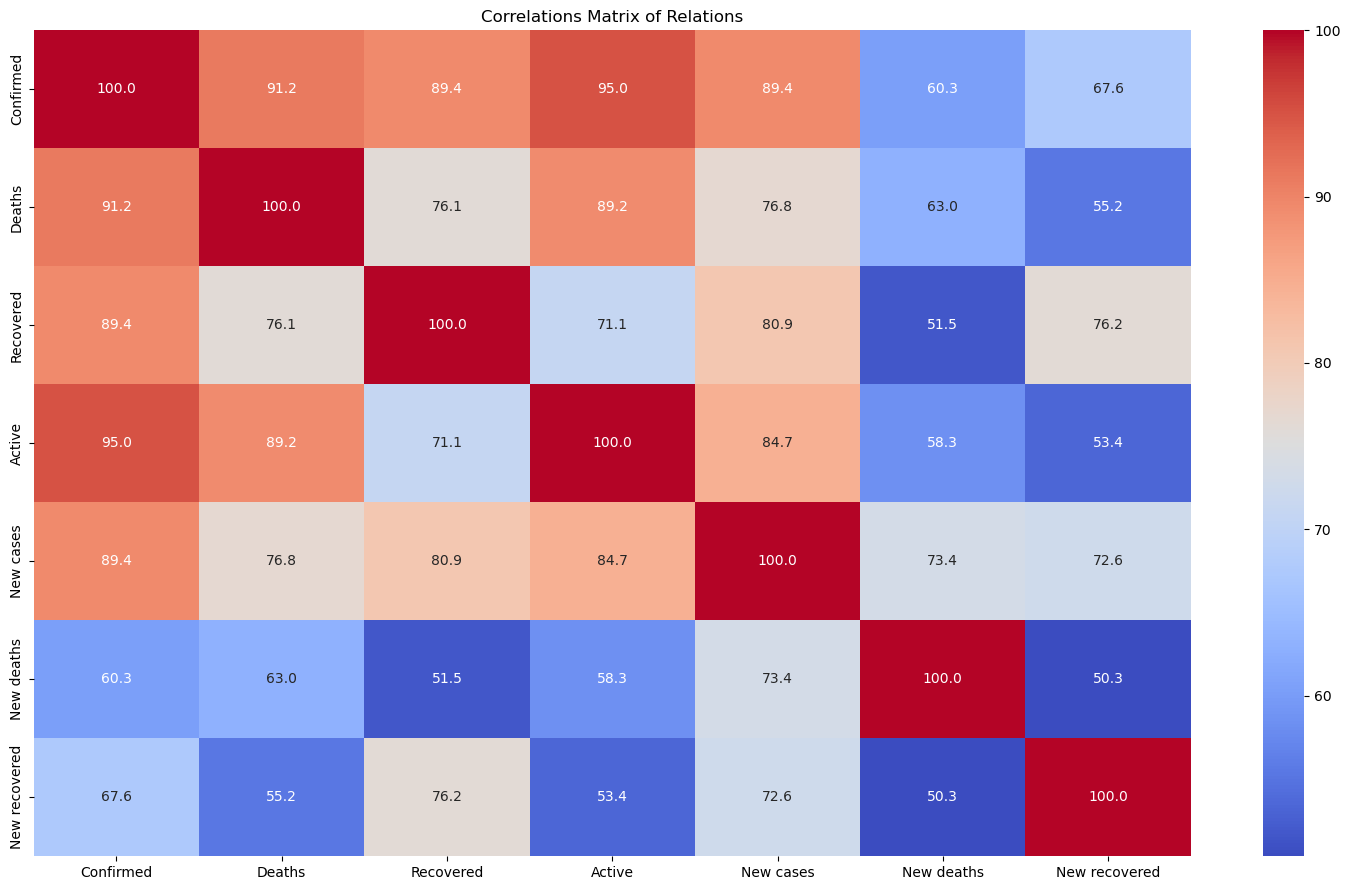

In [179]:
# Plotting the Correlation Relationships
plt.figure(figsize=(15,9))
sns.heatmap(data=Correlations,annot=True,fmt=".1f",cmap='coolwarm')
plt.title("Correlations Matrix of Relations",loc='center')
plt.tight_layout()
plt.show()

- From the Graph above the Correlations Of our Focus **Confirmed , Death , Recovered Covid 19 Cases** For each other is **High** all their **Correlations** Are between **90%** and **95%**  

### 5.2.3 how Confirmed, Deaths, Recovered, Active Change over time ?! 

In [ ]:
# Preparing a the data of the Pivot table
Totals = ['Confirmed','Deaths','Recovered','Active']
Totals_Grouped = full_grouped.groupby(['Month'])[Totals].sum().reset_index()
Totals_Grouped = Totals_Grouped.sort_values(by='Deaths', ascending=True)
Totals_Grouped

,Month,Confirmed,Deaths,Recovered,Active
2,January,38534,889,838,36807
1,February,1663437,46875,363669,1252893
5,March,9002815,397601,2644372,5960842
0,April,63391662,4311214,15944020,43136428
6,May,144990399,9609604,52876838,82503957
4,June,246525787,13309053,116984268,116232466
3,July,362895848,15709667,199594224,147591957


In [ ]:
# Melting the DataFrame into a long Data Table
Totals_Grouped_melted = Totals_Grouped.melt(id_vars=['Month'],value_vars=Totals,var_name='Metric', value_name='Number')
Totals_Grouped_melted.head(5)

,Month,Metric,Number
0,January,Confirmed,38534
1,February,Confirmed,1663437
2,March,Confirmed,9002815
3,April,Confirmed,63391662
4,May,Confirmed,144990399


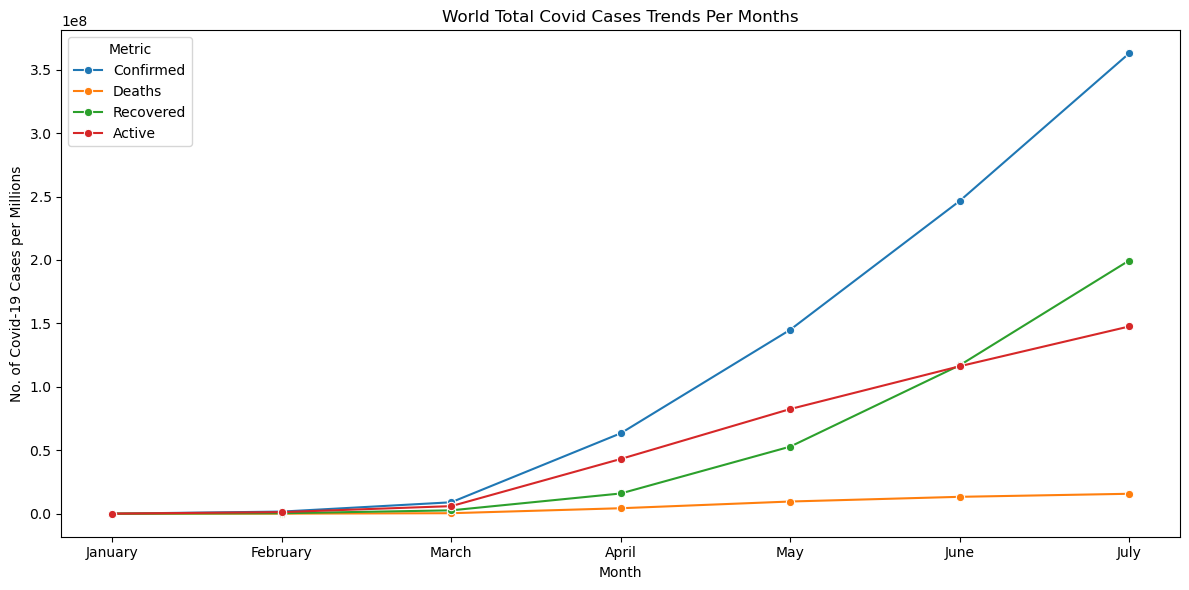

In [ ]:
# Graphing a the data of the Pivot table
plt.figure(figsize=(12, 6))
sns.lineplot(data=Totals_Grouped_melted, x='Month', y='Number', hue='Metric', marker='o')
plt.title('World Total Covid Cases Trends Per Months')
plt.xlabel('Month')
plt.ylabel('No. of Covid-19 Cases per Millions')
plt.tight_layout()
plt.show()

- from the graph we found out that :-
- 1- Over the Period of the **Pandemic** of the **Covid 19** the the Cases were **increasing** in a rapid rate **skyrocketing** from **Marsh onwards** with more cases are being **active**.
- 2- their is a **trend** in active Cases being more than the **Recovered** People till **June**.
- 3- **Death Cases** over the **World** were at the same rate **During** the **Pandemic** **compared** to the **increase** in the **Confirmed** Cases **Infected** during the same **Period**.  

### 5.2.4 What is the Percentages of total Deaths, Recovered, Active Cases for top 10 Countries ordered by Recovered Cases ?!

In [ ]:
# Grouping data into the Required Category for the analysis
Totals = ['Deaths','Recovered','Active']
colors_map = ['red', 'green', 'orange'] 

Totals_Grouped = full_grouped.groupby('Country/Region')[Totals].sum().reset_index()
top_n = 10
Totals_Grouped = Totals_Grouped.sort_values(by='Recovered', ascending=False).head(top_n)
Totals_Grouped

,Country/Region,Deaths,Recovered,Active
173,US,11011411,56353416,156981121
23,Brazil,3938034,54492873,31094060
138,Russia,619385,25120448,19668578
79,India,1111831,23783720,15987913
65,Germany,871322,17107839,3079991
85,Italy,3707717,15673910,7363518
81,Iran,1024136,15200895,3114236
157,Spain,3033030,15093583,9277432
172,Turkey,466056,13345389,4091900
35,Chile,322480,13292593,3320581


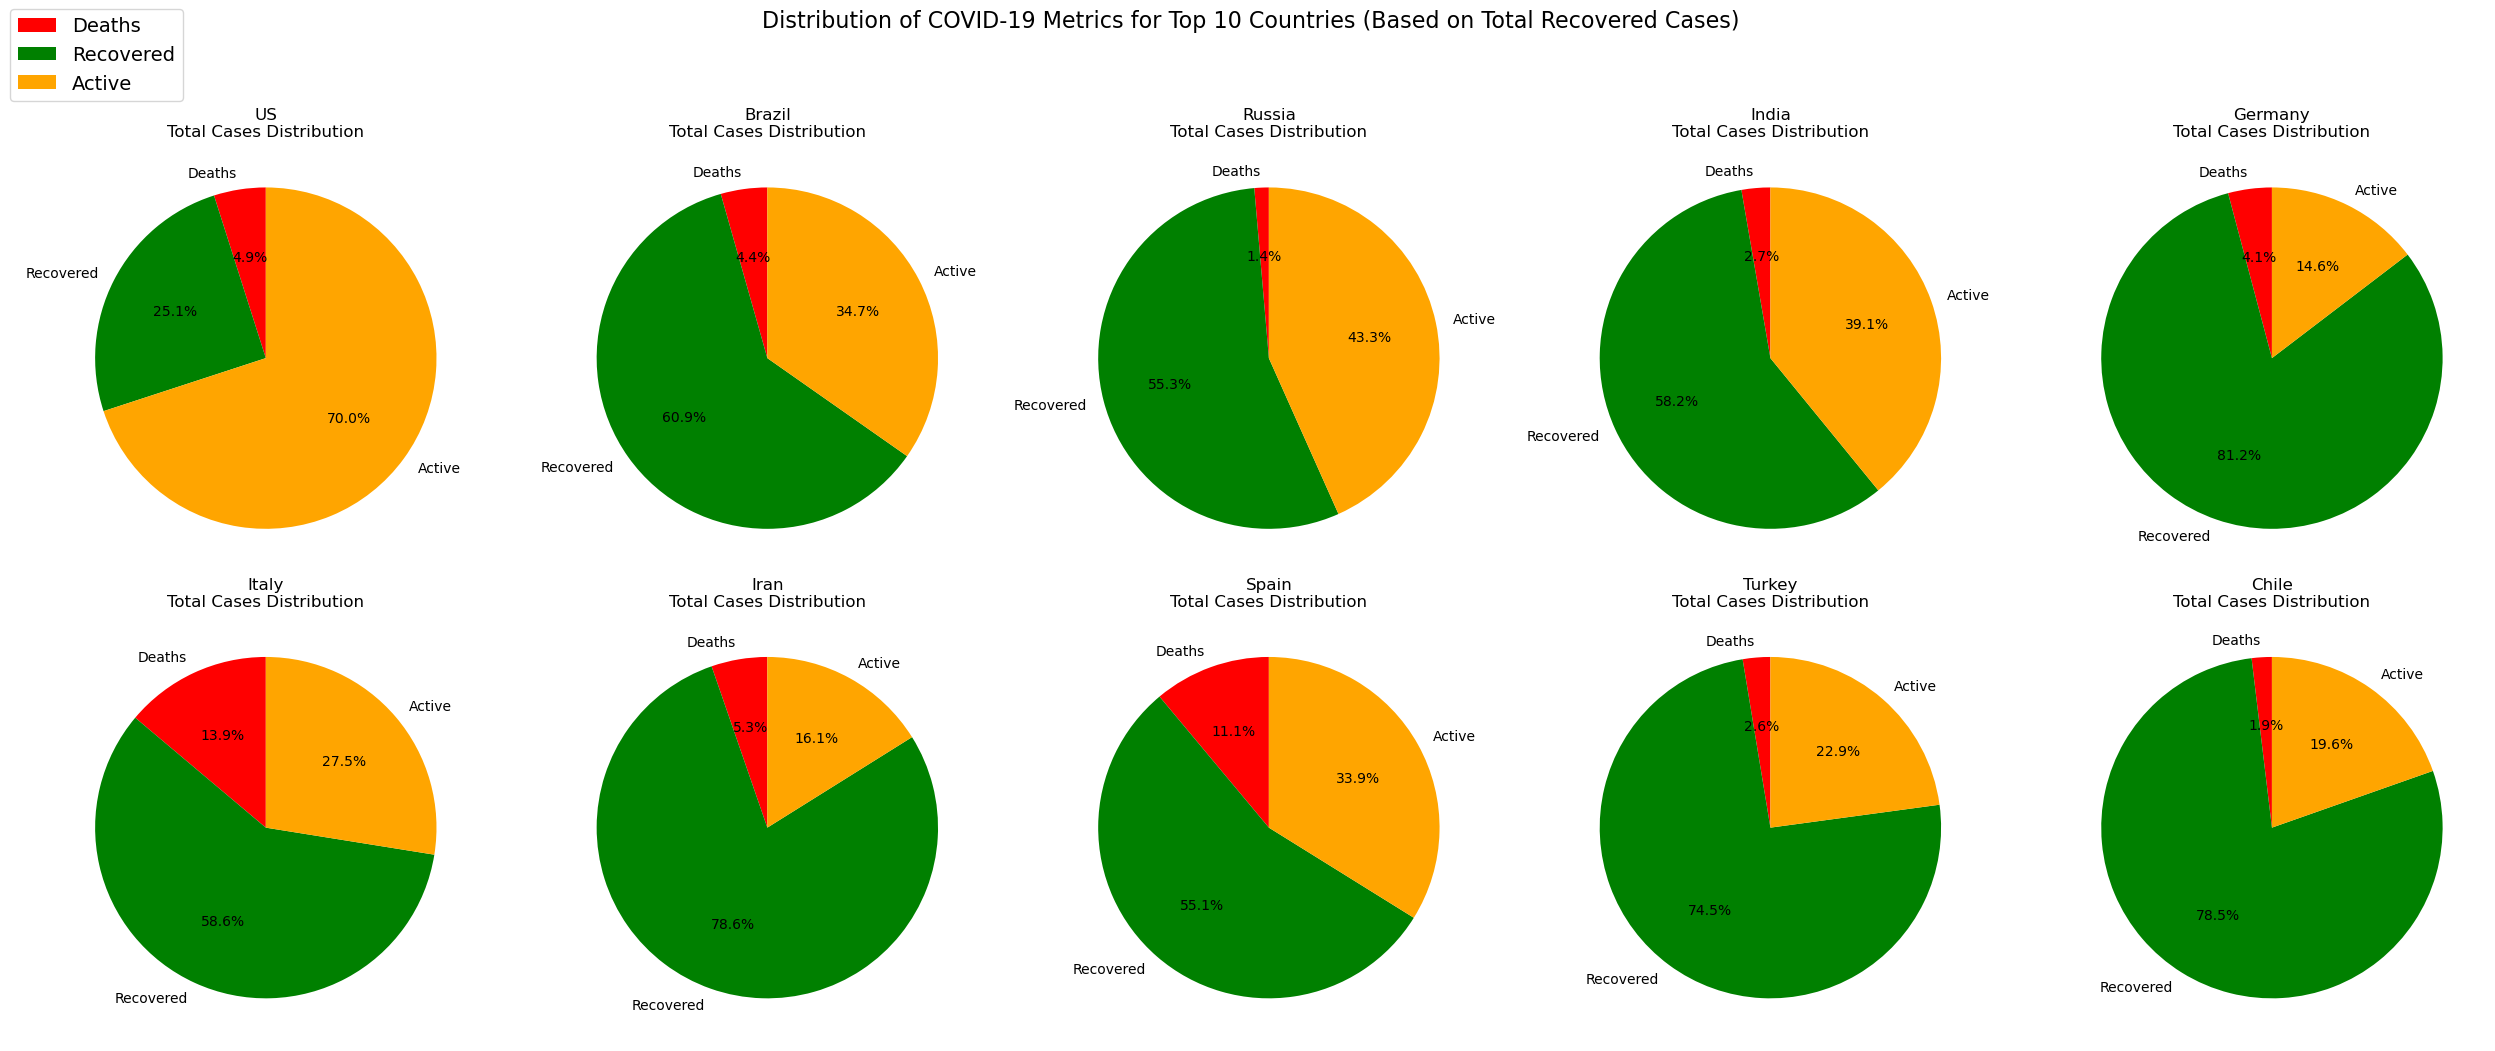

In [ ]:
# Plotting the Comparisons of Each Country for Death, Recovered and Confirmed cases 
fig, ax = plt.subplots(2,5,figsize=(25,10))
ax_flat = ax.flatten()  
for i ,(index,row) in enumerate(Totals_Grouped.iterrows()):
    Country = row['Country/Region']
    pie_values = row[Totals]
    
    ax_flat[i].pie(pie_values,labels=Totals,autopct='%1.1f%%',startangle=90,colors=colors_map)
    ax_flat[i].set_title(f'{Country}\nTotal Cases Distribution', fontsize=12)

fig.suptitle(f'Distribution of COVID-19 Metrics for Top {top_n} Countries (Based on Total Recovered Cases)', fontsize=16, y=1.05)
fig.legend(ax_flat[0].patches,Totals,loc='upper left',fontsize=14)
plt.tight_layout()
plt.show()                 

- from the graph we found out that :-
- 1- **all Countries** have **more** than **50%** Recovered Cases other than **US** with about **25%** Reflecting **Poor Capability** to **Contain** the **pandemic**.
- 2- **Italy** and **Spain** having **more** **Death** Cases as Percentage Compared to Other **Nations** by about **14%** and **11%** Respectively Reflecting maybe more **elderly** or **babies** **death** due to nature of the       **Virus**.
- 3- **Chile** and **Russia** having the **lowest** **Death** Cases by about **less** than **2%** of the total Cases.

### 5.2.5 What is the Percentages of total Deaths, Recovered, Active Cases for WHO Regions ordered by Recovered Cases ?!

In [167]:
# Grouping data into the Required Category for the analysis
Totals = ['Deaths','Recovered','Active']
colors_map = ['red', 'green', 'orange'] 

Totals_Grouped = full_grouped.groupby('WHO Region')[Totals].sum().reset_index()
Totals_Grouped = Totals_Grouped.sort_values(by='Recovered', ascending=False)
Totals_Grouped

,WHO Region,Deaths,Recovered,Active
1,Americas,19359292,157069444,225832458
3,Europe,19271040,123202075,106406678
2,Eastern Mediterranean,1924029,48050703,24108160
4,South-East Asia,1458134,30030327,23629904
5,Western Pacific,932430,18861950,6580031
0,Africa,439978,11193730,10158119


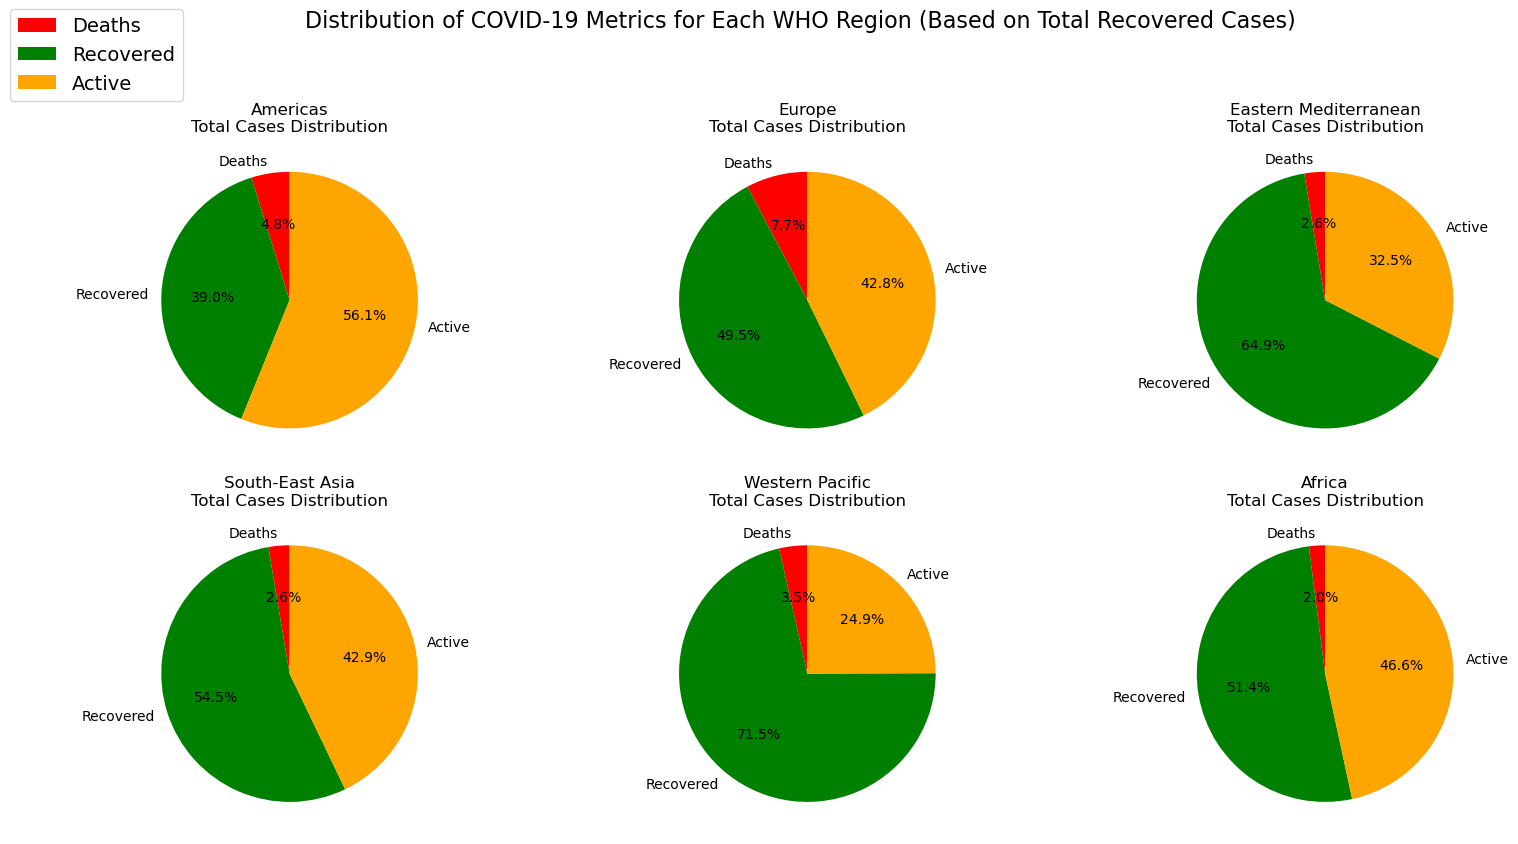

In [170]:
# Plotting the Comparisons of Each Country for Death, Recovered and Confirmed cases 
fig, ax = plt.subplots(2,3,figsize=(16,8))
ax_flat = ax.flatten()  
for i ,(index,row) in enumerate(Totals_Grouped.iterrows()):
    Country = row['WHO Region']
    pie_values = row[Totals]
    
    ax_flat[i].pie(pie_values,labels=Totals,autopct='%1.1f%%',startangle=90,colors=colors_map)
    ax_flat[i].set_title(f'{Country}\nTotal Cases Distribution', fontsize=12)

fig.suptitle(f'Distribution of COVID-19 Metrics for Each WHO Region (Based on Total Recovered Cases)', fontsize=16, y=1.05)
fig.legend(ax_flat[0].patches, Totals, loc='upper left',fontsize=14)
plt.tight_layout()
plt.show()                 

- from the graph we found out that :-
- 1- **Americas** Region has the **Highest** **Active** Cases in all regions by about **39%** and the **second Highest** **Death** cases by **5%** After **Europe** by **7.7%**.
- 2- **Africa** Region has the **lowest** Death cases compared to all regions by about **2%** and the **second Highest** **Active** Cases by **47%** after **Americas** by **39%**.
- 3- **Western Pacific** have the **Highest** Rate of **Recovering** by about **71.5%** and **lowest** **Active** Cases by about **25%** Reflecting a better **Healthcare** System Compared to *Other Regions**. 

### **6. Machine Learning Over Day Grouped by Country Data :-** 

In [171]:
features = full_grouped[['Confirmed', 'Deaths', 'Recovered']]
full_grouped['Severe'] = (full_grouped['Deaths'] / full_grouped['Confirmed']) > 0.05
labels = full_grouped['Severe'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [180]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000,n_jobs=-1),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_jobs=-1),
    "SVM": SVC()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

Logistic Regression - Accuracy: 0.9961 (+/- 0.0009)
Decision Tree - Accuracy: 0.9938 (+/- 0.0008)
KNN - Accuracy: 0.9622 (+/- 0.0031)
SVM - Accuracy: 0.8704 (+/- 0.0023)


In [181]:
final_model = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=1000)
final_model.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')

In [ ]:
y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("🔎 Accuracy:", accuracy)
print("🔎 Precision:", precision)
print("🔎 Recall:", recall)
print("🔎 F1 Score:", f1)
print("\n📊 Confusion Matrix:\n", conf_matrix)
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

🔎 Accuracy: 0.9744027303754266
🔎 Precision: 0.9751156374748564
🔎 Recall: 0.9744027303754266
🔎 F1 Score: 0.9734559921306448

📊 Confusion Matrix:
 [[5939    1]
 [ 179  913]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      5940
           1       1.00      0.84      0.91      1092

    accuracy                           0.97      7032
   macro avg       0.98      0.92      0.95      7032
weighted avg       0.98      0.97      0.97      7032



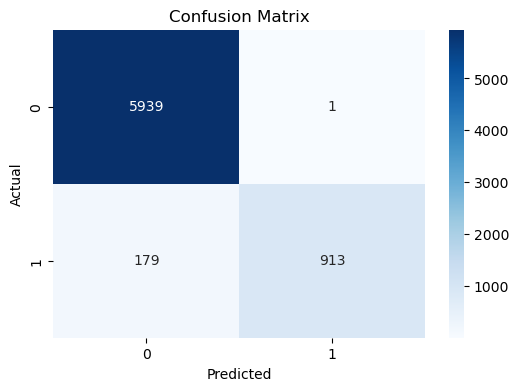

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()